Sample with (width, height): (25, 32) is classified as Pikachu
Sample with (width, height): (24.2, 31.5) is classified as Pikachu
Sample with (width, height): (22, 34) is classified as Pikachu
Sample with (width, height): (20.5, 34) is classified as Pichu


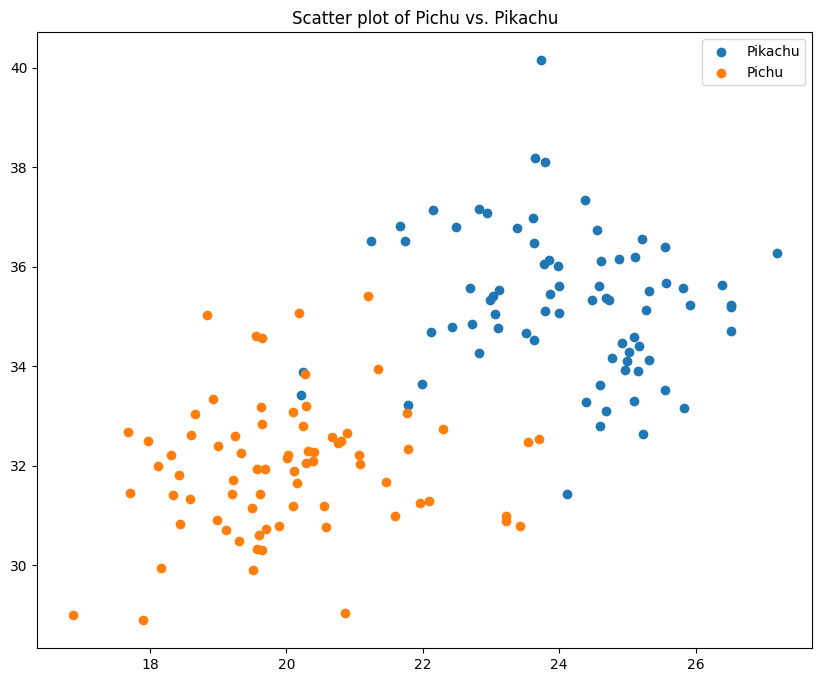

In [1]:
import matplotlib.pyplot as plt

dataset = [(float(x), float(y), float(label)) for x, y, label in (line.strip().split(',') for line in open("datapoints.txt", "r").readlines()[1:])]

points_to_classify = [(25, 32), (24.2, 31.5), (22, 34), (20.5, 34)]
plt.figure(figsize=(10, 8))

width_values, height_values, label_values = zip(*dataset)

def classify_point(coord, data):
    return min(data, key=lambda point: ((coord[0] - point[0]) ** 2 + (coord[1] - point[1]) ** 2) ** 0.5)[2]

classification_results = [f"Sample with (width, height): {point} is classified as {'Pikachu' if classify_point(point, dataset) == 1 else 'Pichu'}" for point in points_to_classify]
print('\n'.join(classification_results))

scatter_data = [(width, height, 'Pikachu' if label == 1 else 'Pichu') for width, height, label in zip(width_values, height_values, label_values)]
pikachu_data = [(width, height) for width, height, label in scatter_data if label == 'Pikachu']
pichu_data = [(width, height) for width, height, label in scatter_data if label == 'Pichu']

plt.scatter(*zip(*pikachu_data), label='Pikachu')
plt.scatter(*zip(*pichu_data), label='Pichu')

plt.title('Scatter plot of Pichu vs. Pikachu')
plt.legend()
plt.show()


In [3]:
while True:
    x_input = float(input("Enter the x-coordinate: "))
    y_input = float(input("Enter the y-coordinate: "))

    if x_input < 0 or y_input < 0:
        print("Enter positive numbers. Please.")
    else:
        user_point = (x_input, y_input)
        predicted_label = classify_point(user_point, dataset)

        result_label = "Pikachu" if predicted_label == 1 else "Pichu"
        print(f"The point {user_point} is classified as {result_label}")

    another_attempt = input("Would you want to try another point?: ").lower()
    if another_attempt != 'yes':
        break


The point (11.0, 22.0) is classified as Pichu


In [8]:
import numpy as np


dataset_array = np.array(dataset)

def classify_point(point, data, k=10):
    distances = np.sqrt(np.sum((data[:, :2] - point) ** 2, axis=1))
    nearest_indices = np.argsort(distances)[:k]
    nearest_labels = data[nearest_indices, 2]
    label_counts = np.bincount(nearest_labels.astype(int))

    if len(label_counts) == 2:
        return "Evenly split" if label_counts[0] == label_counts[1] else np.argmax(label_counts)
    else:
        return label_counts[0]

while True:
    try:
        x_input = float(input("Enter the x-coordinate: "))
        y_input = float(input("Enter the y-coordinate: "))

        if x_input < 0 or y_input < 0:
            print("Enter positive numbers. Please.")
        else:
            user_point = (x_input, y_input)
            predicted_label = classify_point(user_point, dataset_array, k=10)  # Using dataset_array
            result_label = "Pikachu" if predicted_label == 1 else "Pichu"
            print(f"The point {user_point} is classified as {result_label}")

        another_attempt = input("Would you want to try another point? (yes/no): ").lower()
        if another_attempt != 'yes':
            break

    except ValueError:
        print("Invalid input. Please enter valid coordinates.")

The point (43.0, 56.0) is classified as Pikachu
